In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import splitfolders
import os

#os.makedirs('output')
#os.makedirs('output/train')
#os.makedirs('output/val')
#os.makedirs('output/test_set')

In [3]:
image_loc = 'D:\Medicinal Leaf Dataset'

splitfolders.ratio(image_loc, output='output', seed=1337, ratio=(0.8,0.1,0.1))

Copying files: 1615 files [00:19, 81.66 files/s] 


In [4]:
IMAGE_SIZE = [224,224]

train_path = 'output\\train'
validation_path = 'output\\test'

In [5]:
vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

58900480/58889256 [==============================] - 4s 0us/step


In [6]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
for layer in vgg16.layers:
    layer.trainable = False 

In [26]:
folders = glob('D:\Medicinal Leaf Dataset\*')

In [28]:
folders

['D:\\Medicinal Leaf Dataset\\Alpinia Galanga (Rasna)',
 'D:\\Medicinal Leaf Dataset\\Amaranthus Viridis (Arive-Dantu)',
 'D:\\Medicinal Leaf Dataset\\Artocarpus Heterophyllus (Jackfruit)',
 'D:\\Medicinal Leaf Dataset\\Azadirachta Indica (Neem)',
 'D:\\Medicinal Leaf Dataset\\Basella Alba (Basale)',
 'D:\\Medicinal Leaf Dataset\\Brassica Juncea (Indian Mustard)',
 'D:\\Medicinal Leaf Dataset\\Carissa Carandas (Karanda)',
 'D:\\Medicinal Leaf Dataset\\Citrus Limon (Lemon)',
 'D:\\Medicinal Leaf Dataset\\Ficus Auriculata (Roxburgh fig)',
 'D:\\Medicinal Leaf Dataset\\Ficus Religiosa (Peepal Tree)',
 'D:\\Medicinal Leaf Dataset\\Hibiscus Rosa-sinensis',
 'D:\\Medicinal Leaf Dataset\\Jasminum (Jasmine)',
 'D:\\Medicinal Leaf Dataset\\Mangifera Indica (Mango)',
 'D:\\Medicinal Leaf Dataset\\Mentha (Mint)',
 'D:\\Medicinal Leaf Dataset\\Moringa Oleifera (Drumstick)',
 'D:\\Medicinal Leaf Dataset\\Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'D:\\Medicinal Leaf Dataset\\Murraya Koenigii (

In [29]:
x = Flatten()(vgg16.output)

In [30]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = vgg16.input, outputs = prediction)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
model.compile(
loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataGen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataGen  = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_dataGen.flow_from_directory('output\\train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 1360 images belonging to 26 classes.


In [35]:
val_set = train_dataGen.flow_from_directory('output\\val',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 333 images belonging to 26 classes.


In [36]:
r = model.fit_generator(
training_set,
validation_data = val_set,epochs = 50,
steps_per_epoch = len(training_set),
validation_steps = len(val_set)
)

<ipython-input-36-5c48062396c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
43/43 [==============================] - 282s 7s/step - loss: 1.5516 - accuracy: 0.6015 - val_loss: 0.5871 - val_accuracy: 0.8318
Epoch 2/50
43/43 [==============================] - 284s 7s/step - loss: 0.3544 - accuracy: 0.8890 - val_loss: 0.3256 - val_accuracy: 0.9009
Epoch 3/50
43/43 [==============================] - 291s 7s/step - loss: 0.2521 - accuracy: 0.9243 - val_loss: 0.1742 - val_accuracy: 0.9489
Epoch 4/50
43/43 [==============================] - 242s 6s/step - loss: 0.1263 - accuracy: 0.9625 - val_loss: 0.1620 - val_accuracy: 0.9610
Epoch 5/50
43/43 [==============================] - 192s 4s/step - loss: 0.0814 - accuracy: 0.9794 - val_loss: 0.1136 - val_accuracy: 0.9700
Epoch 6/50
43/43 [==============================] - 191s 4s/step - loss: 0.0658 - accuracy: 0.9838 - val_loss: 0.1580 - val_accuracy: 0.9580
Epoch 7/50
43/43 [==============================] - 190s 4s/step - loss: 0.0553 - accuracy: 0.9890 - val_loss: 0.1289 - val_accuracy: 0.9640
Epoch 8/50
43

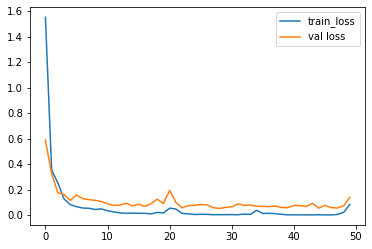

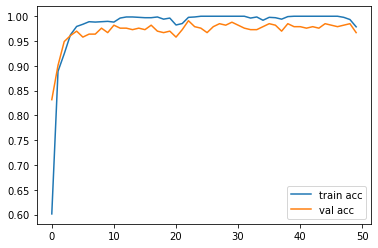

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from tensorflow.keras.models import load_model

model.save('Leaves2.vgg16.h5')

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
t_set = test_dataGen.flow_from_directory('output\\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 181 images belonging to 26 classes.


In [41]:
y_pred = model.predict(t_set)

In [42]:
y_pred

array([[3.5175428e-15, 3.4456219e-11, 6.6271636e-13, ..., 1.5681301e-12,
        1.9699357e-08, 1.2261753e-10],
       [4.3691680e-19, 1.2310869e-10, 4.4410688e-09, ..., 1.3610410e-08,
        9.3024011e-10, 5.4897250e-12],
       [6.2343549e-21, 1.8698592e-13, 3.6764682e-11, ..., 1.0000000e+00,
        3.6504582e-16, 1.4446925e-16],
       ...,
       [2.9389595e-17, 9.9995840e-01, 6.3031049e-14, ..., 1.1555428e-14,
        1.9617384e-10, 2.5213076e-09],
       [8.4643596e-14, 9.9851686e-01, 2.8786609e-11, ..., 6.8496191e-13,
        1.3812571e-11, 9.2007317e-09],
       [1.3430286e-16, 2.0754900e-09, 2.7130116e-17, ..., 3.5924505e-13,
        4.1150270e-13, 7.2960749e-09]], dtype=float32)

In [43]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [44]:
y_pred

array([12, 11, 23,  1,  5,  3, 13, 24, 20,  9, 23, 14, 24,  4, 18,  2, 25,
       23, 24,  6,  8, 24,  0,  6, 13,  2, 11, 22,  3,  0, 12, 17,  4, 18,
       15, 19, 11, 11,  9,  1, 14, 13, 15, 19, 22, 11, 23,  1, 22,  7,  6,
        4,  5, 14, 20, 12, 17,  7,  2, 10,  6, 12, 13,  1, 14, 15, 12,  1,
       17, 14, 24, 14, 13,  7,  2,  9, 14, 16,  6,  4, 13, 12,  2,  7, 18,
        4,  7,  9,  7, 16, 19,  4,  4, 15, 24, 13,  4, 19, 11, 17,  9, 12,
        2, 16, 16, 15,  1,  2, 21, 21, 20, 15,  4, 22,  7,  0, 16, 17,  3,
       24,  6, 16,  7,  4, 11, 18, 20, 13,  3, 24,  6,  1,  9, 25, 13, 21,
       10, 21,  1, 10, 24, 17, 21,  4, 14, 14, 15, 21,  8, 20,  9, 23, 11,
       10, 13,  5, 23, 12,  5, 22,  1,  1, 11, 23, 11, 20, 16,  0,  8,  6,
        3, 13,  0, 22, 10,  1, 19, 22,  1,  1, 13], dtype=int64)

In [45]:
from keras.models import load_model
model = load_model('Leaves2.vgg16.h5')

In [46]:
files = glob('output\\train\\*')

In [47]:
files = list(map(lambda x: x.replace('output\\train\\',''),files))


In [48]:
files

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)']

In [49]:
name_id_map = { i : files[i] for i in range(0, len(files) ) }

In [50]:
name_id_map

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)'}

In [51]:
y_pred

array([12, 11, 23,  1,  5,  3, 13, 24, 20,  9, 23, 14, 24,  4, 18,  2, 25,
       23, 24,  6,  8, 24,  0,  6, 13,  2, 11, 22,  3,  0, 12, 17,  4, 18,
       15, 19, 11, 11,  9,  1, 14, 13, 15, 19, 22, 11, 23,  1, 22,  7,  6,
        4,  5, 14, 20, 12, 17,  7,  2, 10,  6, 12, 13,  1, 14, 15, 12,  1,
       17, 14, 24, 14, 13,  7,  2,  9, 14, 16,  6,  4, 13, 12,  2,  7, 18,
        4,  7,  9,  7, 16, 19,  4,  4, 15, 24, 13,  4, 19, 11, 17,  9, 12,
        2, 16, 16, 15,  1,  2, 21, 21, 20, 15,  4, 22,  7,  0, 16, 17,  3,
       24,  6, 16,  7,  4, 11, 18, 20, 13,  3, 24,  6,  1,  9, 25, 13, 21,
       10, 21,  1, 10, 24, 17, 21,  4, 14, 14, 15, 21,  8, 20,  9, 23, 11,
       10, 13,  5, 23, 12,  5, 22,  1,  1, 11, 23, 11, 20, 16,  0,  8,  6,
        3, 13,  0, 22, 10,  1, 19, 22,  1,  1, 13], dtype=int64)

In [52]:
predicted_classes = list(map(name_id_map.get, y_pred))

In [53]:
predicted_classes

['Mangifera Indica (Mango)',
 'Jasminum (Jasmine)',
 'Psidium Guajava (Guava)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Brassica Juncea (Indian Mustard)',
 'Azadirachta Indica (Neem)',
 'Mentha (Mint)',
 'Punica Granatum (Pomegranate)',
 'Piper Betle (Betel)',
 'Ficus Religiosa (Peepal Tree)',
 'Psidium Guajava (Guava)',
 'Moringa Oleifera (Drumstick)',
 'Punica Granatum (Pomegranate)',
 'Basella Alba (Basale)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Santalum Album (Sandalwood)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Carissa Carandas (Karanda)',
 'Ficus Auriculata (Roxburgh fig)',
 'Punica Granatum (Pomegranate)',
 'Alpinia Galanga (Rasna)',
 'Carissa Carandas (Karanda)',
 'Mentha (Mint)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Jasminum (Jasmine)',
 'Pongamia Pinnata (Indian Beech)',
 'Azadirachta Indica (Neem)',
 'Alpinia Galanga (Rasna)',
 'Mangifera Indica (Mango)',
 'Nerium Oleander (Oleander)',
 'Basella Alba

In [54]:
loss, accuracy = model.evaluate(t_set, verbose=2)

6/6 - 37s - loss: 0.1914 - accuracy: 0.9669 - 37s/epoch - 6s/step


In [55]:
print(f"accuracy on test data is : {round(accuracy*100)} %")

accuracy on test data is : 97 %
